# Support Vector Regression
 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv("Position_Salaries.csv")

x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

## Feature Scaling

In [4]:
y = y.reshape(len(y), 1)
y = y.reshape(-1, 1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [5]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x = sc_x.fit_transform(x)

sc_y = StandardScaler()
y = sc_y.fit_transform(y)


In [6]:
print(x)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [7]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR Model

In [8]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(x, y)


C:\Users\nishu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predict a new result

In [16]:
lvl = ""
y_pred = sc_y.inverse_transform([regressor.predict(sc_x.transform([[int(input("Enter Years of Experience - "))]]))])
if y_pred > 1000000:
    lvl = "CEO"
if y_pred > 500000:
    lvl = "C-Level"
if y_pred > 300000:
    lvl = "Senior Partner"
if y_pred > 200000:
    lvl = "Partner"
if y_pred > 150000:
    lvl = "Region Manager"
if y_pred > 110000:
    lvl = "Country Manager"
if y_pred > 80000:
    lvl = "Manager"
if y_pred > 60000:
    lvl = "Senior Consultant"
if y_pred > 50000:
    lvl = "Junior Consultant"
if y_pred > 45000:
    lvl = "Business Analyst"

print(f"The Employee is of {lvl} level and should have an average salary of - ${round(y_pred[0][0])}")


The Employee is of Business Analyst level and should have an average salary of - $209410


## Visualizing the SVR results

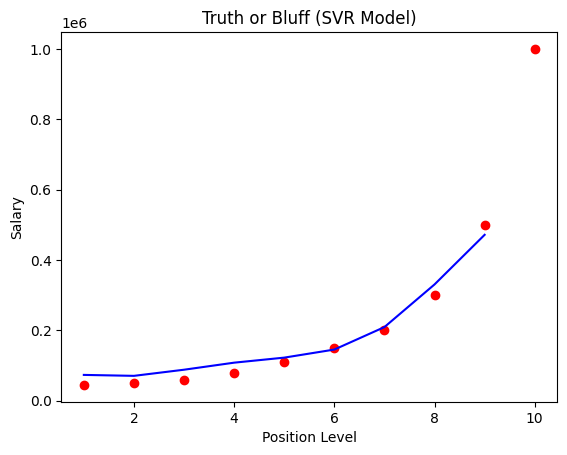

In [10]:
reverse_x = sc_x.inverse_transform(x)
x_grid = np.arange(min(reverse_x), max(reverse_x))
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color = 'red')
plt.plot(x_grid, sc_y.inverse_transform(regressor.predict(sc_x.transform(x_grid)).reshape(len(x_grid),1)), color='blue')
plt.title('Truth or Bluff (SVR Model)') 
plt.xlabel('Position Level') 
plt.ylabel('Salary') 
plt.show()